In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
data = pd.read_csv("./train.csv", sep=",")

In [4]:
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
data.shape

(55423856, 8)

## Data Cleaning Process
* Remove all the rows with NaN's.
* Remove all the rows with 0 values in each of the columns.
* Compute the 99.9 percentile and 0.1 percentile values for each of the latitudes and longitudes.
* Remove all the rows with values lying outside the above limits.
* Remove all the rows with fare amount <= 0 and also fare amount >= 150USD (~99th percentile)
* Remove all the rows with passengers >= 7 (~99th percentile)

In [6]:
missing_data = data[data["dropoff_longitude"].isnull() & data["dropoff_latitude"].isnull()]

In [7]:
missing_data.shape

(376, 8)

In [8]:
missing_data_inds = []
missing_data_inds += missing_data.index.tolist()

In [9]:
zero_pickup_longitude = data[(data["pickup_longitude"]==0)]
zero_pickup_longitude.shape

(1055693, 8)

In [10]:
missing_data_inds += zero_pickup_longitude.index.tolist()

In [11]:
zero_pickup_latitude = data[(data["pickup_latitude"]==0)]
zero_pickup_latitude.shape

(1052158, 8)

In [12]:
missing_data_inds += zero_pickup_latitude.index.tolist()

In [13]:
zero_dropoff_longitude = data[(data["dropoff_longitude"]==0)]
zero_dropoff_longitude.shape

(1052745, 8)

In [14]:
missing_data_inds += zero_dropoff_longitude.index.tolist()

In [15]:
zero_dropoff_latitude = data[(data["dropoff_latitude"]==0)]
zero_dropoff_latitude.shape

(1049666, 8)

In [16]:
missing_data_inds += zero_dropoff_latitude.index.tolist()

In [17]:
zero_fare_amount = data[(data["fare_amount"]==0)]
zero_fare_amount.shape

(1380, 8)

In [18]:
missing_data_inds += zero_fare_amount.index.tolist()

In [19]:
zero_passenger_count = data[(data["passenger_count"]==0)]
zero_passenger_count.shape

(195416, 8)

In [20]:
missing_data_inds += zero_passenger_count.index.tolist()

In [21]:
len(missing_data_inds)

4407434

In [22]:
missing_data_inds = list(set(missing_data_inds))

In [23]:
len(missing_data_inds)

1296797

In [24]:
data_without_na_zero = data.drop(missing_data_inds)
data_without_na_zero.shape

(54127059, 8)

In [25]:
data_without_na_zero["fare_amount"].min()

-300.0

In [26]:
data_without_na_zero["fare_amount"].max()

93963.36

In [27]:
data_without_na_zero = data_without_na_zero[data_without_na_zero["fare_amount"] >= 0]
data_without_na_zero.shape

(54124853, 8)

In [28]:
data_without_na_zero.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.412485e+07,5.412485e+07,5.412485e+07,5.412485e+07,5.412485e+07,5.412485e+07
mean,1.133736e+01,-7.391647e+01,4.069292e+01,-7.391484e+01,4.069177e+01,1.691539e+00
std,2.085949e+01,7.863656e+00,7.508195e+00,7.890859e+00,7.639962e+00,1.315083e+00
min,1.000000e-02,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.493652e+03,1.000000e+00
25%,6.000000e+00,-7.399228e+01,4.073652e+01,-7.399158e+01,4.073551e+01,1.000000e+00
50%,8.500000e+00,-7.398209e+01,4.075335e+01,-7.398059e+01,4.075383e+01,1.000000e+00
75%,1.250000e+01,-7.396826e+01,4.076754e+01,-7.396528e+01,4.076839e+01,2.000000e+00
max,9.396336e+04,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,2.080000e+02


In [29]:
data_without_na_zero = data_without_na_zero[((data_without_na_zero["pickup_longitude"]>=np.percentile(data_without_na_zero["pickup_longitude"],0.1)))]
data_without_na_zero.shape

(54070729, 8)

In [30]:
data_without_na_zero = data_without_na_zero[((data_without_na_zero["pickup_longitude"]<=np.percentile(data_without_na_zero["pickup_longitude"],99.9)))]
data_without_na_zero.shape

(54033114, 8)

In [31]:
data_without_na_zero = data_without_na_zero[((data_without_na_zero["pickup_latitude"]<=np.percentile(data_without_na_zero["pickup_latitude"],99.9)))]
data_without_na_zero.shape

(53979080, 8)

In [32]:
data_without_na_zero = data_without_na_zero[((data_without_na_zero["pickup_latitude"]>=np.percentile(data_without_na_zero["pickup_latitude"],0.1)))]
data_without_na_zero.shape

(53925120, 8)

In [33]:
data_without_na_zero = data_without_na_zero[((data_without_na_zero["dropoff_longitude"]>=np.percentile(data_without_na_zero["dropoff_longitude"],0.1)))]
data_without_na_zero.shape

(53871230, 8)

In [34]:
data_without_na_zero = data_without_na_zero[((data_without_na_zero["dropoff_longitude"]<=np.percentile(data_without_na_zero["dropoff_longitude"],99.9)))]
data_without_na_zero.shape

(53817358, 8)

In [35]:
data_without_na_zero = data_without_na_zero[((data_without_na_zero["dropoff_latitude"]<=np.percentile(data_without_na_zero["dropoff_latitude"],99.9)))]
data_without_na_zero.shape

(53763545, 8)

In [36]:
data_without_na_zero = data_without_na_zero[((data_without_na_zero["dropoff_latitude"]>=np.percentile(data_without_na_zero["dropoff_latitude"],0.1)))]
data_without_na_zero.shape

(53709782, 8)

In [37]:
data_without_na_zero.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.370978e+07,5.370978e+07,5.370978e+07,5.370978e+07,5.370978e+07,5.370978e+07
mean,1.115886e+01,-7.397560e+01,4.075098e+01,-7.397462e+01,4.075138e+01,1.691163e+00
std,2.065172e+01,3.376065e-02,2.631170e-02,3.230815e-02,2.965752e-02,1.313808e+00
min,1.000000e-02,-7.404253e+01,4.063956e+01,-7.417725e+01,4.060696e+01,1.000000e+00
25%,6.000000e+00,-7.399227e+01,4.073667e+01,-7.399156e+01,4.073585e+01,1.000000e+00
50%,8.500000e+00,-7.398211e+01,4.075340e+01,-7.398063e+01,4.075391e+01,1.000000e+00
75%,1.250000e+01,-7.396842e+01,4.076751e+01,-7.396558e+01,4.076836e+01,2.000000e+00
max,9.396336e+04,-7.314683e+01,4.085129e+01,-7.374761e+01,4.088127e+01,2.080000e+02


In [38]:
data_without_na_zero = data_without_na_zero[((data_without_na_zero["passenger_count"]<=7.0))]
data_without_na_zero.shape

(53709737, 8)

In [39]:
data_without_na_zero["distance"] = np.sqrt(((data_without_na_zero["dropoff_latitude"] - data_without_na_zero["pickup_latitude"]) ** 2) + ((data_without_na_zero["dropoff_longitude"] - data_without_na_zero["pickup_longitude"]) ** 2))

In [40]:
data_without_na_zero.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
count,5.370974e+07,5.370974e+07,5.370974e+07,5.370974e+07,5.370974e+07,5.370974e+07,5.370974e+07
mean,1.115885e+01,-7.397560e+01,4.075098e+01,-7.397462e+01,4.075138e+01,1.691073e+00,3.342670e-02
std,2.065172e+01,3.376064e-02,2.631170e-02,3.230814e-02,2.965753e-02,1.307034e+00,3.717777e-02
min,1.000000e-02,-7.404253e+01,4.063956e+01,-7.417725e+01,4.060696e+01,1.000000e+00,0.000000e+00
25%,6.000000e+00,-7.399227e+01,4.073667e+01,-7.399156e+01,4.073585e+01,1.000000e+00,1.280780e-02
50%,8.500000e+00,-7.398211e+01,4.075340e+01,-7.398063e+01,4.075391e+01,1.000000e+00,2.173874e-02
75%,1.250000e+01,-7.396842e+01,4.076751e+01,-7.396558e+01,4.076836e+01,2.000000e+00,3.838472e-02
max,9.396336e+04,-7.314683e+01,4.085129e+01,-7.374761e+01,4.088127e+01,7.000000e+00,8.462889e-01


In [41]:
data_without_na_zero = data_without_na_zero[data_without_na_zero["fare_amount"] <= 150]
data_without_na_zero.shape

(53708886, 9)

In [42]:
corr_distace_fare = data_without_na_zero["distance"].corr(data_without_na_zero["fare_amount"], method='pearson')

In [43]:
corr_distace_fare

0.883698656384901

In [44]:
data_without_na_zero['pickup_datetime'] = data_without_na_zero['pickup_datetime'].str.replace(" UTC", "")
data_without_na_zero.shape

(53708886, 9)

In [45]:
data_without_na_zero['pickup_datetime'] = pd.to_datetime(data_without_na_zero['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

In [46]:
data_without_na_zero["time_of_day"] = (data_without_na_zero.pickup_datetime.dt.hour*60) + data_without_na_zero.pickup_datetime.dt.minute
data_without_na_zero["time_of_day"].shape

(53708886,)

In [47]:
corr_time_distance = data_without_na_zero["time_of_day"].corr(data_without_na_zero["distance"], method='pearson')
corr_time_distance

-0.029261452842436277

In [48]:
corr_time_fare = data_without_na_zero["time_of_day"].corr(data_without_na_zero["fare_amount"], method='pearson')
corr_time_fare

-0.01576489060431111

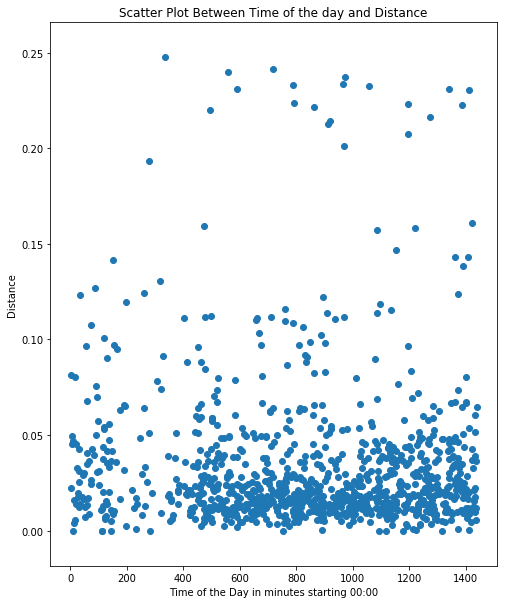

In [49]:
plt.figure(figsize=(8,10))
plt.xlabel("Time of the Day in minutes starting 00:00")
plt.ylabel("Distance")
plt.title("Scatter Plot Between Time of the day and Distance")
plt.scatter(data_without_na_zero["time_of_day"][:1000], data_without_na_zero["distance"][:1000])
plt.show()

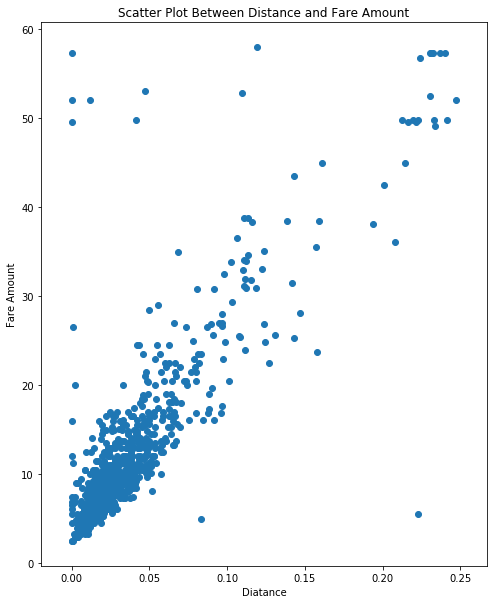

In [50]:
plt.figure(figsize=(8,10))
plt.xlabel("Diatance")
plt.ylabel("Fare Amount")
plt.title("Scatter Plot Between Distance and Fare Amount")
plt.scatter(data_without_na_zero["distance"][:1000], data_without_na_zero["fare_amount"][:1000])
plt.show()

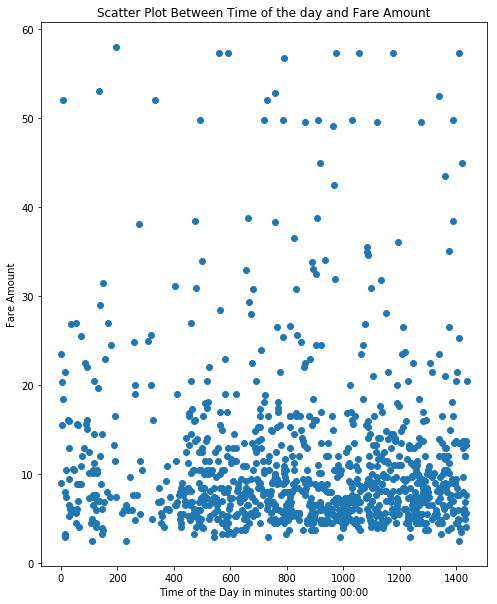

In [51]:
plt.figure(figsize=(8,10))
plt.xlabel("Time of the Day in minutes starting 00:00")
plt.ylabel("Fare Amount")
plt.title("Scatter Plot Between Time of the day and Fare Amount")
plt.scatter(data_without_na_zero["time_of_day"][:1000], data_without_na_zero["fare_amount"][:1000])
plt.show()

In [52]:
data_without_na_zero["hour"] = data_without_na_zero.pickup_datetime.dt.hour
data_without_na_zero["day"] = data_without_na_zero.pickup_datetime.dt.day
data_without_na_zero["day_of_week"] = data_without_na_zero.pickup_datetime.dt.weekday
data_without_na_zero["month"] = data_without_na_zero.pickup_datetime.dt.month

In [53]:
data_without_na_zero.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,time_of_day,hour,day,day_of_week,month
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,1046,17,15,0,6
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,1012,16,5,1,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,35,0,18,3,8
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,270,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,471,7,9,1,3


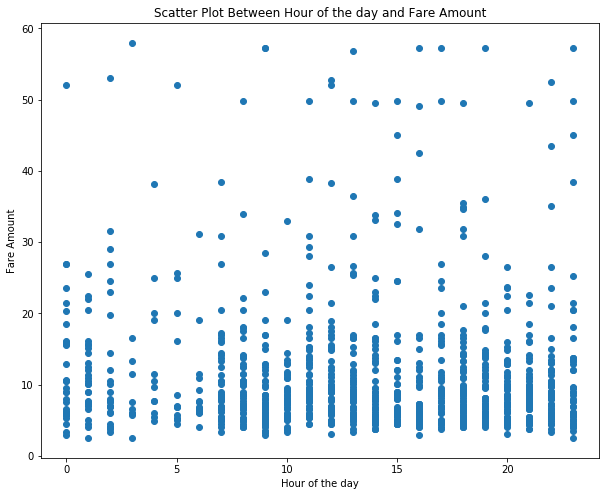

In [54]:
plt.figure(figsize=(10,8))
plt.xlabel("Hour of the day")
plt.ylabel("Fare Amount")
plt.title("Scatter Plot Between Hour of the day and Fare Amount")
plt.scatter(data_without_na_zero["hour"][:1000], data_without_na_zero["fare_amount"][:1000])
plt.show()

* We observe that the prices of the cabs are high either during the late night and early mornings or during the peak office     hours.

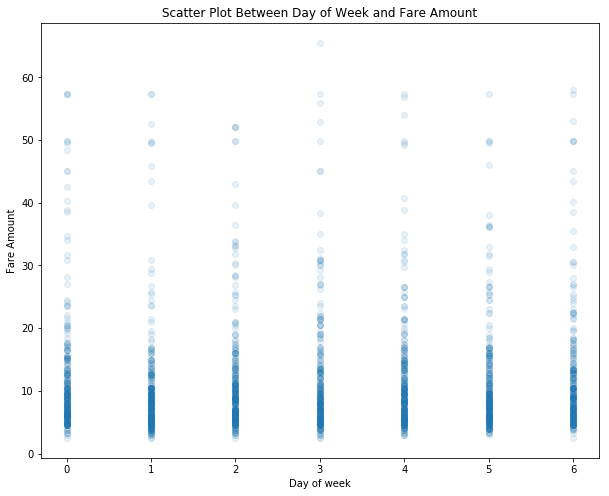

In [55]:
plt.figure(figsize=(10,8))
plt.xlabel("Day of week")
plt.ylabel("Fare Amount")
plt.title("Scatter Plot Between Day of Week and Fare Amount")
plt.scatter(data_without_na_zero["day_of_week"][:2000], data_without_na_zero["fare_amount"][:2000], alpha=0.1)
plt.show()

In [56]:
data_without_na_zero["day_of_week"] = data_without_na_zero.pickup_datetime.dt.day_name()

In [57]:
data_without_na_zero.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,time_of_day,hour,day,day_of_week,month
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,1046,17,15,Monday,6
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,1012,16,5,Tuesday,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,35,0,18,Thursday,8
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,270,4,21,Saturday,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,471,7,9,Tuesday,3


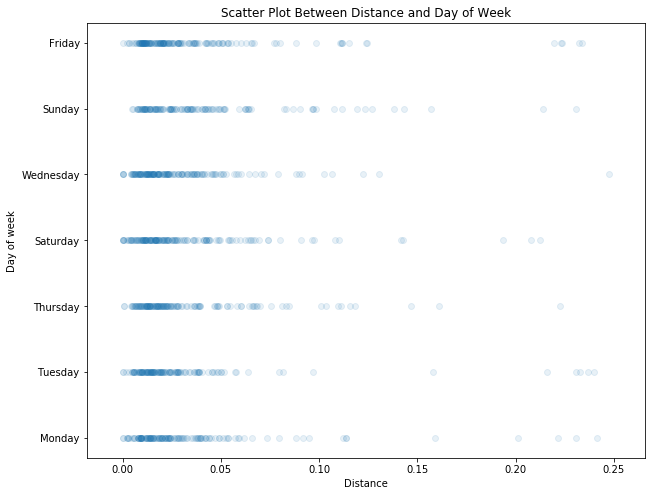

In [58]:
plt.figure(figsize=(10,8))
plt.xlabel("Distance")
plt.ylabel("Day of week")
plt.title("Scatter Plot Between Distance and Day of Week")
plt.scatter(data_without_na_zero["distance"][:1000], data_without_na_zero["day_of_week"][:1000], alpha=0.1)
plt.show()

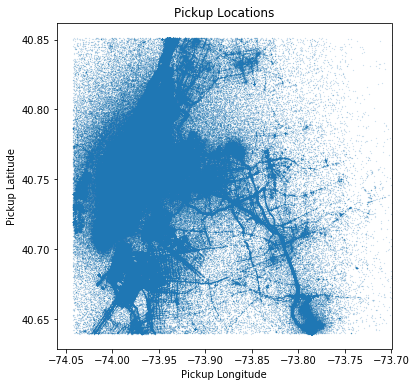

In [125]:
plt.figure(figsize=(6,6))
plt.xlabel("Pickup Longitude")
plt.ylabel("Pickup Latitude")
plt.title("Pickup Locations")
plt.xlim(-74.06,-73.7)
plt.scatter(data_without_na_zero["pickup_longitude"], data_without_na_zero["pickup_latitude"], alpha=0.5, s=0.03)
plt.show()

* We observe that most of the pickups are from Manhatten and Queens most of which includes airport pickups

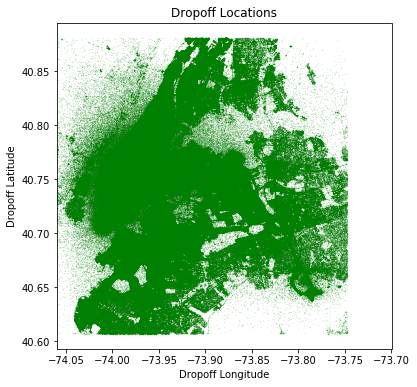

In [124]:
plt.figure(figsize=(6,6))
plt.xlabel("Dropoff Longitude")
plt.ylabel("Dropoff Latitude")
plt.title("Dropoff Locations")
plt.xlim(-74.06,-73.7)
plt.scatter(data_without_na_zero["dropoff_longitude"], data_without_na_zero["dropoff_latitude"], alpha=0.5, s=0.01, color='green')
plt.show()

* We observe that the drop off locations are distributed throughout all the Boroughs of NYC

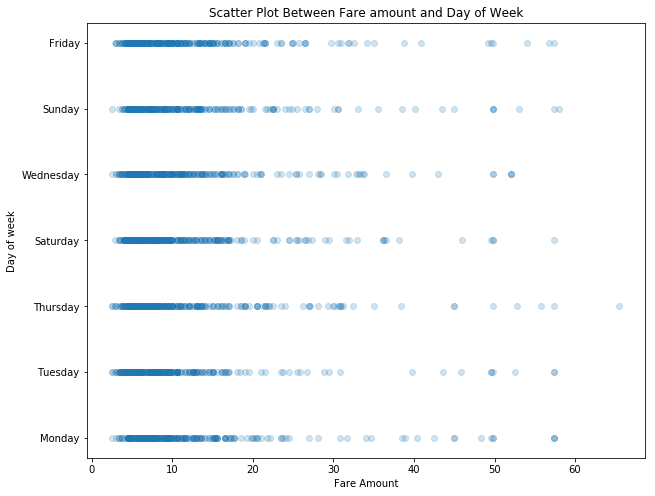

In [61]:
plt.figure(figsize=(10,8))
plt.xlabel("Fare Amount")
plt.ylabel("Day of week")
plt.title("Scatter Plot Between Fare amount and Day of Week")
plt.scatter(data_without_na_zero["fare_amount"][:2000], data_without_na_zero["day_of_week"][:2000], alpha=0.2)
plt.show()

In [62]:
test_data = pd.read_csv("./test.csv", sep=",")

In [63]:
test_data.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [64]:
data_without_na_zero["day_of_week"] = data_without_na_zero.pickup_datetime.dt.weekday

In [65]:
data_without_na_zero.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,time_of_day,hour,day,day_of_week,month
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,1046,17,15,0,6
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,1012,16,5,1,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,35,0,18,3,8
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,270,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,471,7,9,1,3


In [66]:
# train_data = data_without_na_zero[:10000000]

In [67]:
# target = train_data['fare_amount']
# features = train_data.drop(['fare_amount','pickup_datetime','key'], axis=1)

In [68]:
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.2)

In [69]:
# model = LinearRegression()
# model.fit(features, target)

In [70]:
# pred = model.predict(X_test)

* Below are the co-efficients for different features in the model

In [71]:
# model.coef_

In [72]:
# np.sqrt(metrics.mean_squared_error(y_test, pred))

In [73]:
# X_train.head()

In [74]:
test_data.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [75]:
test_data["distance"] = np.sqrt(((test_data["dropoff_latitude"] - test_data["pickup_latitude"]) ** 2) + ((test_data["dropoff_longitude"] - test_data["pickup_longitude"]) ** 2))

In [76]:
test_data.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,0.021554
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,0.023180
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,0.005870
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,0.018649
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,0.050631


In [77]:
test_data['pickup_datetime'] = test_data['pickup_datetime'].str.replace(" UTC", "")
test_data['pickup_datetime'] = pd.to_datetime(test_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
test_data["time_of_day"] = (test_data.pickup_datetime.dt.hour*60) + test_data.pickup_datetime.dt.minute
test_data["time_of_day"].shape

(9914,)

In [78]:
test_data["hour"] = test_data.pickup_datetime.dt.hour
test_data["day"] = test_data.pickup_datetime.dt.day
test_data["day_of_week"] = test_data.pickup_datetime.dt.weekday
test_data["month"] = test_data.pickup_datetime.dt.month

In [79]:
test_data.shape

(9914, 13)

In [80]:
test_data.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,time_of_day,hour,day,day_of_week,month
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,0.021554,788,13,27,1,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,0.023180,788,13,27,1,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.005870,713,11,8,5,10
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,0.018649,1272,21,1,5,12
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,0.050631,1272,21,1,5,12


In [81]:
# x_test = test_data.drop(['pickup_datetime','key'], axis=1)

In [82]:
# submission_pred = model.predict(x_test)

In [83]:
# submission_pred

In [84]:
# df = pd.DataFrame()

In [85]:
# df["key"] = test_data["key"]

In [86]:
# df["fare_amount"] = submission_pred

In [87]:
# df.head()

In [88]:
# df.to_csv("vr_linear_regression.csv", sep=",", index=False)

In [122]:
train_data = data_without_na_zero[:10000000]
target = train_data['fare_amount']
features = train_data.drop(['fare_amount','pickup_datetime','key','time_of_day','day'], axis=1)
model = LinearRegression()
model.fit(features, target)
model.coef_

array([ 1.12453903e+01,  3.79198031e+00, -9.42194372e-01, -1.51826049e+01,
        3.41778331e-02,  2.09508519e+02,  1.14840604e-02, -3.61266877e-02,
        3.62673991e-02])

In [127]:
features.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'distance', 'hour',
       'day_of_week', 'month'],
      dtype='object')

In [90]:
x_test = test_data.drop(['pickup_datetime','key','time_of_day','day'], axis=1)
submission_pred = model.predict(x_test)
submission_pred

In [91]:
df = pd.DataFrame()
df["key"] = test_data["key"]
df["fare_amount"] = submission_pred
df.to_csv("vr_linear_regression.csv", sep=",", index=False)

In [92]:
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(n_estimators = 15)
# rf.fit(features, target)

In [93]:
# rf.feature_importances_

In [94]:
# rf_5_preds = rf.predict(x_test)

In [95]:
# df = pd.DataFrame()
# df["key"] = test_data["key"]
# df["fare_amount"] = rf_5_preds
# df.to_csv("vr_Randomforest_regression.csv", sep=",", index=False)

In [96]:
# from sklearn.svm import SVR
# clf = SVR()
# clf.fit(features, target)

In [97]:
# from sklearn.neural_network import MLPRegressor
# mlp = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam', learning_rate='constant', learning_rate_init=0.01,  max_iter=1000)
# mlp.fit(features, target)

In [98]:
# nn_preds = mlp.predict(x_test)

In [99]:
# df = pd.DataFrame()
# df["key"] = test_data["key"]
# df["fare_amount"] = nn_preds
# df.to_csv("vr_mlp_regressor.csv", sep=",", index=False)

In [100]:
# target = (target - target.mean())/target.std()

In [101]:
# features = (features - features.mean())/features.std()

In [102]:
# rf = RandomForestRegressor(n_estimators = 10)
# rf.fit(features, target)

In [103]:
# x_test = (x_test - x_test.mean())/x_test.std()

In [104]:
# x_test.head()

In [105]:
# preds = rf.predict(x_test)

In [106]:
# preds

In [107]:
# preds = (preds*train_data["fare_amount"].std()) + train_data["fare_amount"].mean()

In [108]:
# preds

In [109]:
# df = pd.DataFrame()
# df["key"] = test_data["key"]
# df["fare_amount"] = preds
# df.to_csv("vr_Randomforest_regression_v2.csv", sep=",", index=False)

In [115]:
train_data = data_without_na_zero[:10000000]
target = train_data['fare_amount']
features = train_data.drop(['fare_amount','pickup_datetime','key','time_of_day','day'], axis=1)

In [116]:
target = (target - target.mean())/target.std()
features = (features - features.mean())/features.std()

In [117]:
import lightgbm as lgbm
lgbm_train_data = lgbm.Dataset(features, target, silent=True)
params = {
        'boosting_type': 'gbdt', 'objective': 'regression','learning_rate': 0.005,  
        'reg_alpha': 1, 'reg_lambda': 0.001, 'metric': 'rmse'}
model = lgbm.train(params, train_set=lgbm_train_data, num_boost_round=1000)

In [120]:
x_test = test_data.drop(['pickup_datetime','key','time_of_day','day'], axis=1)
x_test = (x_test - x_test.mean())/x_test.std()
lgbm_preds = model.predict(x_test)
lgbm_preds = (lgbm_preds*train_data["fare_amount"].std()) + train_data["fare_amount"].mean()
print(lgbm_preds)

[ 8.99233897  9.34311555  5.3696885  ... 42.87808188 18.23889502
  6.92615164]


In [121]:
df = pd.DataFrame()
df["key"] = test_data["key"]
df["fare_amount"] = lgbm_preds
df.to_csv("vr_lgbm_v2.csv", sep=",", index=False)